# Predicting Loan Defaults
> Author: Alex Lau

## Table of Contents

https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html

1. [Table of Contents](#1.-Table-of-Contents)
2. [Exploratory Data Analysis](#2.-Exploratory-Data-Analysis)
    <br>2.1 [Import Packages and Data](#2.1-Import-Packages-and-Data)
    <br>2.2 [High Level Checks](#2.2-High-Level-Checks)
    <br>2.3 [Investigating Target Variable](#2.3-Investigating-Target-Variable)
    <br>2.4 [Investigating Features](#2.4-Investigating-Features)
3. [Data Cleaning](#3.-Data-Cleaning)
4. [Feature Engineering](#4.-Feature-Engineering)
5. [Revisiting Exploratory Data Analysis: Correlations Deep Dive](#5.-Revisiting-Exploratory-Data-Analysis:-Correlations-Deep-Dive)
6. [Preprocessing](#6.-Preprocessing)
7. [Modeling](#7.-Modeling)
    <br>7.1 [Baseline Model](#7.1-Baseline-Model)
    <br>7.2 [Logistic Regression](#7.2-Logistic-Regression)
    <br>7.3 [KNeighbors Classifier](#7.3-KNeighbors-Classifier)
    <br>7.4 [Random Forest Classifier](#7.4-Random-Forest-Classifier)
    <br>7.5 [Extra Trees Classifier](#7.5-Extra-Trees-Classifier)
    <br>7.6 [AdaBoost Classifier](#7.6-AdaBoost-Classifier)
    <br>7.7 [Support Vector Machine](#7.7-Support-Vector-Machine)
    <br>7.8 [Gaussian Naive Bayes Classifier](#7.8-Gaussian-Naive-Bayes-Classifier)
    <br>7.9 [Gradient Boost Classifier](#7.9-Gradient-Boost-Classifier)
    <br>7.10 [Voting Classifier](#Voting-Classifier)
8. [Conclusions and Evaluation](#8.-Conclusions-and-Evaluation)

## 2. Exploratory Data Analysis

### 2.1 Import Packages and Data

In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import confusion_matrix, precision_recall_curve, auc, roc_auc_score, roc_curve, recall_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier, ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE

Download data from this website after creating an account
https://www.lendingclub.com/info/statistics.action

Read in main dataframe that we created from the "Downloading Data" notebook.

In [92]:
# Read in the main dataframe we have created after consolidating the downloaded files.
# this results in a mixed type warning, so we will check what these columns are
df = pd.read_csv('../Data/FullLoanStats.csv')

C:\Users\16463\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (51,146,147,148) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


### 2.2 High Level Checks

In [93]:
# checking the first 5 rows of our dataframe
# we will remove the Unnamed columns, but first we will check the warning on mixed type columns since these are indexed
df.head()

Unnamed: 0  Unnamed: 1         id  member_id  loan_amnt  funded_amnt  \
0   2019Q1_1          13  149477700        NaN    15000.0      15000.0   
1   2019Q1_1          17  149521312        NaN     3025.0       3025.0   
2   2019Q1_1          54  149416464        NaN     5000.0       5000.0   
3   2019Q1_1          56  148453246        NaN    12000.0      12000.0   
4   2019Q1_1          65  149484294        NaN     3000.0       3000.0   

   funded_amnt_inv        term int_rate  installment grade sub_grade  \
0          15000.0   36 months   17.97%       542.07     D        D1   
1           3025.0   36 months   17.19%       108.14     C        C5   
2           5000.0   36 months   20.00%       185.82     D        D2   
3          12000.0   60 months   12.40%       269.37     B        B4   
4           3000.0   36 months   15.57%       104.84     C        C3   

                  emp_title emp_length home_ownership  annual_inc  \
0  Administrative Assistant    5 years       MORTGAGE     58240.0   
1        Warehouse employee    3 years           RENT     30000.0   
2            Security Guard   < 1 year           RENT     42000.0   
3                       NaN   < 1 year            OWN     89000.0   
4              Ramp Service  10+ years           RENT     50000.0   

  verification_status issue_d loan_status pymnt_plan  \
0            Verified  Mar-19  Fully Paid          n   
1     Source Verified  Mar-19  Fully Paid          n   
2        Not Verified  Mar-19  Fully Paid          n   
3        Not Verified  Mar-19  Fully Paid          n   
4        Not Verified  Mar-19  Fully Paid          n   

                                                 url  desc  \
0  https://lendingclub.com/browse/loanDetail.acti...   NaN   
1  https://lendingclub.com/browse/loanDetail.acti...   NaN   
2  https://lendingclub.com/browse/loanDetail.acti...   NaN   
3  https://lendingclub.com/browse/loanDetail.acti...   NaN   
4  https://lendingclub.com/browse/loanDetail.acti...   NaN   

              purpose                    title zip_code addr_state    dti  \
0  debt_consolidation       Debt consolidation    907xx         CA  38.53   
1  debt_consolidation       Debt consolidation    300xx         GA  11.88   
2               other                    Other    112xx         NY   6.46   
3    home_improvement         Home improvement    739xx         OK  17.00   
4         credit_card  Credit card refinancing    207xx         MD  17.41   

   delinq_2yrs earliest_cr_line  fico_range_low  fico_range_high  \
0          1.0           Aug-05           660.0            664.0   
1          0.0           Jul-05           665.0            669.0   
2          4.0           Apr-07           665.0            669.0   
3          0.0           May-99           730.0            734.0   
4          0.0           Dec-99           680.0            684.0   

   inq_last_6mths  mths_since_last_delinq  mths_since_last_record  open_acc  \
0             0.0                     8.0                     NaN       9.0   
1             0.0                    27.0                     NaN       9.0   
2             0.0                    21.0                     NaN       4.0   
3             4.0                     NaN                   105.0      11.0   
4             0.0                    52.0                     NaN       8.0   

   pub_rec  revol_bal revol_util  total_acc initial_list_status  out_prncp  \
0      0.0    67035.0     66.40%       18.0                   w        0.0   
1      0.0     2885.0     43.70%       22.0                   w        0.0   
2      0.0     1719.0     68.80%        8.0                   w        0.0   
3      1.0     8977.0     25.60%       21.0                   f        0.0   
4      0.0     7542.0     41.70%       23.0                   w        0.0   

   out_prncp_inv   total_pymnt  total_pymnt_inv  total_rec_prncp  \
0            0.0  16566.611300         16566.61          15000.0   
1            0.0   3191.876646          3191.88

The following columns will be removed for our model, since these are not relevant for predicting a loan default before approving the loan. Deb settlement refers to activity post default. 

In [94]:
# columns 51, 146, 147, 148 have mixed types

# create a list of these columns
mixed_type_columns = [51, 146, 147, 148]

# iterate through this list and print every column name
for column in mixed_type_columns:
    print(list(df.columns)[column])

next_pymnt_d
debt_settlement_flag_date
settlement_status
settlement_date


In [95]:
# Removing unnamed columns
df.drop(columns = ['Unnamed: 0', 'Unnamed: 1'], inplace = True)
df.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  149477700        NaN    15000.0      15000.0          15000.0   36 months   
1  149521312        NaN     3025.0       3025.0           3025.0   36 months   
2  149416464        NaN     5000.0       5000.0           5000.0   36 months   
3  148453246        NaN    12000.0      12000.0          12000.0   60 months   
4  149484294        NaN     3000.0       3000.0           3000.0   36 months   

  int_rate  installment grade sub_grade                 emp_title emp_length  \
0   17.97%       542.07     D        D1  Administrative Assistant    5 years   
1   17.19%       108.14     C        C5        Warehouse employee    3 years   
2   20.00%       185.82     D        D2            Security Guard   < 1 year   
3   12.40%       269.37     B        B4                       NaN   < 1 year   
4   15.57%       104.84     C        C3              Ramp Service  10+ years   

  home_ownership  annual_inc verification_status issue_d loan_status  \
0       MORTGAGE     58240.0            Verified  Mar-19  Fully Paid   
1           RENT     30000.0     Source Verified  Mar-19  Fully Paid   
2           RENT     42000.0        Not Verified  Mar-19  Fully Paid   
3            OWN     89000.0        Not Verified  Mar-19  Fully Paid   
4           RENT     50000.0        Not Verified  Mar-19  Fully Paid   

  pymnt_plan                                                url  desc  \
0          n  https://lendingclub.com/browse/loanDetail.acti...   NaN   
1          n  https://lendingclub.com/browse/loanDetail.acti...   NaN   
2          n  https://lendingclub.com/browse/loanDetail.acti...   NaN   
3          n  https://lendingclub.com/browse/loanDetail.acti...   NaN   
4          n  https://lendingclub.com/browse/loanDetail.acti...   NaN   

              purpose                    title zip_code addr_state    dti  \
0  debt_consolidation       Debt consolidation    907xx         CA  38.53   
1  debt_consolidation       Debt consolidation    300xx         GA  11.88   
2               other                    Other    112xx         NY   6.46   
3    home_improvement         Home improvement    739xx         OK  17.00   
4         credit_card  Credit card refinancing    207xx         MD  17.41   

   delinq_2yrs earliest_cr_line  fico_range_low  fico_range_high  \
0          1.0           Aug-05           660.0            664.0   
1          0.0           Jul-05           665.0            669.0   
2          4.0           Apr-07           665.0            669.0   
3          0.0           May-99           730.0            734.0   
4          0.0           Dec-99           680.0            684.0   

   inq_last_6mths  mths_since_last_delinq  mths_since_last_record  open_acc  \
0             0.0                     8.0                     NaN       9.0   
1             0.0                    27.0                     NaN       9.0   
2             0.0                    21.0                     NaN       4.0   
3             4.0                     NaN                   105.0      11.0   
4             0.0                    52.0                     NaN       8.0   

   pub_rec  revol_bal revol_util  total_acc initial_list_status  out_prncp  \
0      0.0    67035.0     66.40%       18.0                   w        0.0   
1      0.0     2885.0     43.70%       22.0                   w        0.0   
2      0.0     1719.0     68.80%        8.0                   w        0.0   
3      1.0     8977.0     25.60%       21.0                   f        0.0   
4      0.0     7542.0     41.70%       23.0                   w        0.0   

   out_prncp_inv   total_pymnt  total_pymnt_inv  total_rec_prncp  \
0            0.0  16566.611300         16566.61          15000.0   
1            0.0   3191.876646          3191.88           3025.0   
2            0.0   5375.467128          5375.47           5000.0   
3            0.0  12712.274860         12712.27          12000.0   
4            0.0   3

In [96]:
# Checking number of rows and columns of dataframe
df.shape

(44171, 150)

In [97]:
# removing view limitation so we can see all columns
pd.set_option('display.max_columns', None)

# checking the top 5 rows
df.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  149477700        NaN    15000.0      15000.0          15000.0   36 months   
1  149521312        NaN     3025.0       3025.0           3025.0   36 months   
2  149416464        NaN     5000.0       5000.0           5000.0   36 months   
3  148453246        NaN    12000.0      12000.0          12000.0   60 months   
4  149484294        NaN     3000.0       3000.0           3000.0   36 months   

  int_rate  installment grade sub_grade                 emp_title emp_length  \
0   17.97%       542.07     D        D1  Administrative Assistant    5 years   
1   17.19%       108.14     C        C5        Warehouse employee    3 years   
2   20.00%       185.82     D        D2            Security Guard   < 1 year   
3   12.40%       269.37     B        B4                       NaN   < 1 year   
4   15.57%       104.84     C        C3              Ramp Service  10+ years   

  home_ownership  annual_inc verification_status issue_d loan_status  \
0       MORTGAGE     58240.0            Verified  Mar-19  Fully Paid   
1           RENT     30000.0     Source Verified  Mar-19  Fully Paid   
2           RENT     42000.0        Not Verified  Mar-19  Fully Paid   
3            OWN     89000.0        Not Verified  Mar-19  Fully Paid   
4           RENT     50000.0        Not Verified  Mar-19  Fully Paid   

  pymnt_plan                                                url  desc  \
0          n  https://lendingclub.com/browse/loanDetail.acti...   NaN   
1          n  https://lendingclub.com/browse/loanDetail.acti...   NaN   
2          n  https://lendingclub.com/browse/loanDetail.acti...   NaN   
3          n  https://lendingclub.com/browse/loanDetail.acti...   NaN   
4          n  https://lendingclub.com/browse/loanDetail.acti...   NaN   

              purpose                    title zip_code addr_state    dti  \
0  debt_consolidation       Debt consolidation    907xx         CA  38.53   
1  debt_consolidation       Debt consolidation    300xx         GA  11.88   
2               other                    Other    112xx         NY   6.46   
3    home_improvement         Home improvement    739xx         OK  17.00   
4         credit_card  Credit card refinancing    207xx         MD  17.41   

   delinq_2yrs earliest_cr_line  fico_range_low  fico_range_high  \
0          1.0           Aug-05           660.0            664.0   
1          0.0           Jul-05           665.0            669.0   
2          4.0           Apr-07           665.0            669.0   
3          0.0           May-99           730.0            734.0   
4          0.0           Dec-99           680.0            684.0   

   inq_last_6mths  mths_since_last_delinq  mths_since_last_record  open_acc  \
0             0.0                     8.0                     NaN       9.0   
1             0.0                    27.0                     NaN       9.0   
2             0.0                    21.0                     NaN       4.0   
3             4.0                     NaN                   105.0      11.0   
4             0.0                    52.0                     NaN       8.0   

   pub_rec  revol_bal revol_util  total_acc initial_list_status  out_prncp  \
0      0.0    67035.0     66.40%       18.0                   w        0.0   
1      0.0     2885.0     43.70%       22.0                   w        0.0   
2      0.0     1719.0     68.80%        8.0                   w        0.0   
3      1.0     8977.0     25.60%       21.0                   f        0.0   
4      0.0     7542.0     41.70%       23.0                   w        0.0   

   out_prncp_inv   total_pymnt  total_pymnt_inv  total_rec_prncp  \
0            0.0  16566.611300         16566.61          15000.0   
1            0.0   3191.876646          3191.88           3025.0   
2            0.0   5375.467128          5375.47           5000.0   
3            0.0  12712.274860         12712.27          12000.0   
4            0.0   3

In [98]:
# Checking statistics
df.describe()

id  member_id     loan_amnt   funded_amnt  funded_amnt_inv  \
count  4.417100e+04        0.0  44171.000000  44171.000000     44171.000000   
mean   1.513762e+08        NaN  14709.117973  14709.117973     14705.859312   
std    4.655374e+06        NaN   9993.174523   9993.174523      9995.153440   
min    1.428428e+08        NaN   1000.000000   1000.000000       725.000000   
25%    1.475898e+08        NaN   7000.000000   7000.000000      7000.000000   
50%    1.502016e+08        NaN  12000.000000  12000.000000     12000.000000   
75%    1.544611e+08        NaN  20000.000000  20000.000000     20000.000000   
max    1.641904e+08        NaN  40000.000000  40000.000000     40000.000000   

        installment    annual_inc  desc           dti   delinq_2yrs  \
count  44171.000000  4.417100e+04   0.0  44061.000000  44171.000000   
mean     440.796324  8.668986e+04   NaN     19.325508      0.231306   
std      291.138774  1.201019e+05   NaN     20.825540      0.792021   
min       28.770000  0.000000e+00   NaN      0.000000      0.000000   
25%      225.795000  5.000000e+04   NaN     11.080000      0.000000   
50%      361.380000  7.000000e+04   NaN     17.410000      0.000000   
75%      597.310000  1.000000e+05   NaN     24.650000      0.000000   
max     1676.230000  9.000000e+06   NaN    999.000000     21.000000   

       fico_range_low  fico_range_high  inq_last_6mths  \
count    44171.000000     44171.000000    44171.000000   
mean       710.852143       714.852641        0.569220   
std         37.708645        37.710424        0.833136   
min        660.000000       664.000000        0.000000   
25%        680.000000       684.000000        0.000000   
50%        705.000000       709.000000        0.000000   
75%        735.000000       739.000000        1.000000   
max        845.000000       850.000000        5.000000   

       mths_since_last_delinq  mths_since_last_record      open_acc  \
count            19140.000000             5647.000000  44171.000000   
mean                37.150000               86.296795     11.730026   
std                 21.878785               23.400366      5.999135   
min                  1.000000                2.000000      0.000000   
25%                 19.000000               71.000000      8.000000   
50%                 34.000000               91.000000     11.000000   
75%                 54.000000              106.000000     15.000000   
max                169.000000              119.000000     84.000000   

            pub_rec      revol_bal     total_acc     out_prncp  out_prncp_inv  \
count  44171.000000   44171.000000  44171.000000  44171.000000   44171.000000   
mean       0.129542   15780.724299     25.111227      1.365678       1.365678   
std        0.342081   23852.638710     13.030174    155.388569     155.388569   
min        0.000000       0.000000      2.000000      0.000000       0.000000   
25%        0.000000    4575.500000     16.000000      0.000000       0.000000   
50%        0.000000    9834.000000     23.000000      0.000000       0.000000   
75%        0.000000   18772.000000     32.000000      0.000000       0.000000   
max        6.000000  827165.000000    142.000000  27750.930000   27750.930000   

        total_pymnt  total_pymnt_inv  total_rec_prncp  total_rec_int  \
count  44171.000000     44171.000000     44171.000000   44171.000000   
mean   13453.670997     13450.554645     12739.050372     662.022529   
std    10639.801265     10641.165362     10279.286340     778.583433   
min        0.000000         0.000000         0.000000       0.000000   
25%     5148.927159      5144.880000      5000.000000     136.945000   
50%    10672.171080     10671.330000     10000.000000     398.590000   
75%    19689.197615     19688.705000     18900.000000     899.255000   
max    47027.966390     47027.970000     40000.000000    7907.680000   

       total_rec_late_fee    recoveries  collection_recovery_fee  \
count        44171.000000  44171.000000             441

In [99]:
# checking datatypes, memory usage, 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44171 entries, 0 to 44170
Columns: 150 entries, id to settlement_term
dtypes: float64(119), int64(1), object(30)
memory usage: 50.5+ MB


In [100]:
# setting row view limitation, 150 for the number of columns
pd.set_option("display.max_rows", 150)
# viewing datatypes of each column
df.dtypes

id                                              int64
member_id                                     float64
loan_amnt                                     float64
funded_amnt                                   float64
funded_amnt_inv                               float64
term                                           object
int_rate                                       object
installment                                   float64
grade                                          object
sub_grade                                      object
emp_title                                      object
emp_length                                     object
home_ownership                                 object
annual_inc                                    float64
verification_status                            object
issue_d                                        object
loan_status                                    object
pymnt_plan                                     object
url                         

Below are the counts of the null values of our dataset. We will remove all features where all values are the same. This includes where null values = 44171, since that is the shape of our dataframe. We will also remove all data that is collected after the loan is approved, includuing settlement columns mentioned earlier, since we are trying to predict loan defaults from before the loan is approved. This activity will be reviewed in section 2.4

In [101]:
# viewing all columns with null values sorted by count
df.isnull().sum().sort_values(ascending = False)

hardship_reason                               44171
hardship_status                               44171
hardship_amount                               44171
hardship_start_date                           44171
hardship_end_date                             44171
payment_plan_start_date                       44171
hardship_length                               44171
hardship_dpd                                  44171
hardship_loan_status                          44171
orig_projected_additional_accrued_interest    44171
hardship_payoff_balance_amount                44171
hardship_last_payment_amount                  44171
member_id                                     44171
hardship_type                                 44171
desc                                          44171
deferral_term                                 44171
next_pymnt_d                                  44166
settlement_percentage                         43901
settlement_term                               43901
settlement_s

### 2.3 Investigating Target Variable

In [102]:
# getting distribution of target variable
df['loan_status'].value_counts()

Fully Paid     38672
Charged Off     5494
Default            5
Name: loan_status, dtype: int64

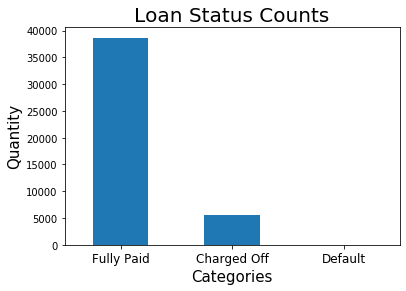

In [103]:
# visualize the quantities
df['loan_status'].value_counts().plot.bar()
plt.title('Loan Status Counts', size = 20)
plt.xlabel('Categories', size = 15)
plt.ylabel('Quantity', size = 15)
plt.xticks(rotation = 0, size = 12);

In [104]:
# getting percentages of each value
df['loan_status'].value_counts(normalize = True)

Fully Paid     0.875507
Charged Off    0.124380
Default        0.000113
Name: loan_status, dtype: float64

Over 12% of our list of loans were defaulted. This is expected to be a low percentage, since Lending Club would not approve loans if they thought the borrowers would default. They have also been improving on the fully paid vs charged off or default ratio over the years. 
We will use Smote to help with our unbalanced classes.

We will consolidate these values into a category of default or not, 1 or 0.

Charged off means ...
https://www.marketwatch.com/story/everything-you-need-to-know-about-a-charged-off-debt-2019-08-15

We will group Fully Paid as NOT defaulted, target y variable 0. 
We will group Charged Off and Default as defaulted target y variable 1.

In [105]:
# investigating the mean values of the numberical features for each target variable group
df.groupby(by = ['loan_status']).mean()

id  member_id     loan_amnt   funded_amnt  \
loan_status                                                        
Charged Off  1.493045e+08        NaN  16856.152166  16856.152166   
Default      1.494147e+08        NaN  13695.000000  13695.000000   
Fully Paid   1.516708e+08        NaN  14404.227219  14404.227219   

             funded_amnt_inv  installment    annual_inc  desc        dti  \
loan_status                                                                
Charged Off     16853.760768   510.752060  83802.824057   NaN  20.899416   
Default         13695.000000   418.186000  55756.800000   NaN  18.350000   
Fully Paid      14400.844927   430.860873  87104.011879   NaN  19.101956   

             delinq_2yrs  fico_range_low  fico_range_high  inq_last_6mths  \
loan_status                                                                 
Charged Off     0.223699      703.052421       707.053695        0.619767   
Default         0.000000      701.000000       705.000000        0.200000   
Fully Paid      0.232416      711.961497       715.961885        0.562086   

             mths_since_last_delinq  mths_since_last_record   open_acc  \
loan_status                                                              
Charged Off               35.552654               87.097561  11.442301   
Default                   53.000000                     NaN   7.200000   
Fully Paid                37.369264               86.184040  11.771488   

              pub_rec     revol_bal  total_acc  out_prncp  out_prncp_inv  \
loan_status                                                                
Charged Off  0.129414  16415.638697  22.883873      0.000          0.000   
Default      0.000000   6717.200000  19.200000  12064.674      12064.674   
Fully Paid   0.129577  15691.696007  25.428424      0.000          0.000   

              total_pymnt  total_pymnt_inv  total_rec_prncp  total_rec_int  \
loan_status                                                                  
Charged Off   2148.356596      2148.053280      1028.061041     700.034982   
Default       2728.632000      2728.632000      1630.326000    1078.260000   
Fully Paid   15061.165373     15057.648979     14404.227219     656.568412   

             total_rec_late_fee  recoveries  collection_recovery_fee  \
loan_status                                                            
Charged Off            2.188841  418.071742                61.359413   
Default               20.046000    0.000000                 0.000000   
Fully Paid             0.369733    0.000000                 0.000000   

             last_pymnt_amnt  last_fico_range_high  last_fico_range_low  \
loan_status                                                               
Charged Off       518.549392            581.271751           515.373134   
Default           442.014000            579.000000           575.000000   
Fully Paid      11997.162592            719.968685           715.827731   

             collections_12_mths_ex_med  mths_since_last_major_derog  \
loan_status                                                            
Charged Off                     0.01711                    44.381289   
Default                         0.20000                    41.000000   
Fully Paid                      0.01492                    46.664376   

             policy_code  annual_inc_joint  dti_joint  acc_now_delinq  \
loan_status                                                             
Charged Off          1.0     137120.110196  20.326284        0.000000   
Default              1.0     152000.000000  26.240000        0.000000   
Fully Paid           1.0     139201.737199  18.258312        0.000052   

             tot_coll_amt    tot_cur_bal  open_acc_6m  open_act_il  \
loan_status                                                          
Charged Off    187.872588  134878.631962     1.122497     2.609574   
Default       3821.000000   61867.000000     0.800000     3.400000   
Fully Paid     156.356951  1

In [106]:
# need a visual on the fully paid vs charged off


### 2.4 Investigating Features

In [107]:
# function for returning the unique values and count, sorted by descending order, based on user specified column
def show_values(column):
    return df[column].value_counts().sort_values(ascending = False)
 
# function for counting null values in a specified column
def null_count(column):
    return df[column].isnull().value_counts().sort_values(ascending = False)

In [108]:
# checking that all id values are unique no repeats
show_values('id')

149028864    1
148398092    1
147855363    1
145694724    1
145696773    1
            ..
146221051    1
163470186    1
148891619    1
158139494    1
147344033    1
Name: id, Length: 44171, dtype: int64

In [109]:
# check distribution of applications
show_values('application_type')

Individual    38812
Joint App      5359
Name: application_type, dtype: int64

We can see that average loans approved for Joint applications are over 19,000 USD, where individuals are 14,000 USD. Joint apps also have a higher joint debt to income ratios at 18.5 vs 17.5 for individuals. 

In [110]:
# checking any visible differences in values of features joint vs individual applications
df.groupby(by = ['application_type']).mean()

id  member_id     loan_amnt   funded_amnt  \
application_type                                                        
Individual        1.513943e+08        NaN  14072.192878  14072.192878   
Joint App         1.512453e+08        NaN  19321.981713  19321.981713   

                  funded_amnt_inv  installment    annual_inc  desc        dti  \
application_type                                                                
Individual           14068.714229   423.552502  89393.304974   NaN  17.472308   
Joint App            19320.316290   565.682911  67110.448615   NaN  33.028383   

                  delinq_2yrs  fico_range_low  fico_range_high  \
application_type                                                 
Individual           0.233407      709.705375       713.705710   
Joint App            0.216085      719.157492       723.159171   

                  inq_last_6mths  mths_since_last_delinq  \
application_type                                           
Individual              0.585412               37.246858   
Joint App               0.451950               36.400730   

                  mths_since_last_record   open_acc   pub_rec     revol_bal  \
application_type                                                              
Individual                     85.856571  11.817247  0.130424  15580.236628   
Joint App                      89.651908  11.098339  0.123157  17232.735398   

                  total_acc  out_prncp  out_prncp_inv   total_pymnt  \
application_type                                                      
Individual        25.319231   1.289535       1.289535  12897.176798   
Joint App         23.604777   1.917134       1.917134  17484.022345   

                  total_pymnt_inv  total_rec_prncp  total_rec_int  \
application_type                                                    
Individual           12893.848774     12221.060099     625.746222   
Joint App            17482.438996     16490.541043     924.749910   

                  total_rec_late_fee  recoveries  collection_recovery_fee  \
application_type                                                            
Individual                  0.510263   49.860202                 7.031448   
Joint App                   1.235247   67.496171                11.980600   

                  last_pymnt_amnt  last_fico_range_high  last_fico_range_low  \
application_type                                                               
Individual           10082.513216            702.258786           690.223642   
Joint App            14085.256440            705.908378           695.626983   

                  collections_12_mths_ex_med  mths_since_last_major_derog  \
application_type                                                            
Individual                          0.016361                    46.326639   
Joint App                           0.006904                    46.742714   

                  policy_code  annual_inc_joint  dti_joint  acc_now_delinq  \
application_type                                                             
Individual                1.0               NaN        NaN        0.000052   
Joint App                 1.0     138906.195186  18.555777        0.000000   

                  tot_coll_amt    tot_cur_bal  open_acc_6m  open_act_il  \
application_type                                                          
Individual          166.168015  158248.301376     1.124936     2.795527   
Joint App           121.030043  212413.292219     0.978354     2.829073   

                  open_il_12m  open_il_24m  mths_since_rcnt_il  total_bal_il  \
application_type                                                               
Individual           0.967690     2.052406           15.861083  38942.646166   
Joint App            0.870685     1.891211           18.272518  44855.908938   

                    il_util  open_rv_12m  open_rv_24m   max_bal_bc   all_util  \
application_type                                                      

We will need to treat individual and joint applications differently, since average loan values for joint applications are higher 

In [111]:
# creating separate dataframes for individual and joint apps
df_individual = df[df['application_type']=='Individual']
df_JointApp = df[df['application_type']=='Joint App']

# checking individual dataframes
df_individual.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  149477700        NaN    15000.0      15000.0          15000.0   36 months   
1  149521312        NaN     3025.0       3025.0           3025.0   36 months   
2  149416464        NaN     5000.0       5000.0           5000.0   36 months   
3  148453246        NaN    12000.0      12000.0          12000.0   60 months   
4  149484294        NaN     3000.0       3000.0           3000.0   36 months   

  int_rate  installment grade sub_grade                 emp_title emp_length  \
0   17.97%       542.07     D        D1  Administrative Assistant    5 years   
1   17.19%       108.14     C        C5        Warehouse employee    3 years   
2   20.00%       185.82     D        D2            Security Guard   < 1 year   
3   12.40%       269.37     B        B4                       NaN   < 1 year   
4   15.57%       104.84     C        C3              Ramp Service  10+ years   

  home_ownership  annual_inc verification_status issue_d loan_status  \
0       MORTGAGE     58240.0            Verified  Mar-19  Fully Paid   
1           RENT     30000.0     Source Verified  Mar-19  Fully Paid   
2           RENT     42000.0        Not Verified  Mar-19  Fully Paid   
3            OWN     89000.0        Not Verified  Mar-19  Fully Paid   
4           RENT     50000.0        Not Verified  Mar-19  Fully Paid   

  pymnt_plan                                                url  desc  \
0          n  https://lendingclub.com/browse/loanDetail.acti...   NaN   
1          n  https://lendingclub.com/browse/loanDetail.acti...   NaN   
2          n  https://lendingclub.com/browse/loanDetail.acti...   NaN   
3          n  https://lendingclub.com/browse/loanDetail.acti...   NaN   
4          n  https://lendingclub.com/browse/loanDetail.acti...   NaN   

              purpose                    title zip_code addr_state    dti  \
0  debt_consolidation       Debt consolidation    907xx         CA  38.53   
1  debt_consolidation       Debt consolidation    300xx         GA  11.88   
2               other                    Other    112xx         NY   6.46   
3    home_improvement         Home improvement    739xx         OK  17.00   
4         credit_card  Credit card refinancing    207xx         MD  17.41   

   delinq_2yrs earliest_cr_line  fico_range_low  fico_range_high  \
0          1.0           Aug-05           660.0            664.0   
1          0.0           Jul-05           665.0            669.0   
2          4.0           Apr-07           665.0            669.0   
3          0.0           May-99           730.0            734.0   
4          0.0           Dec-99           680.0            684.0   

   inq_last_6mths  mths_since_last_delinq  mths_since_last_record  open_acc  \
0             0.0                     8.0                     NaN       9.0   
1             0.0                    27.0                     NaN       9.0   
2             0.0                    21.0                     NaN       4.0   
3             4.0                     NaN                   105.0      11.0   
4             0.0                    52.0                     NaN       8.0   

   pub_rec  revol_bal revol_util  total_acc initial_list_status  out_prncp  \
0      0.0    67035.0     66.40%       18.0                   w        0.0   
1      0.0     2885.0     43.70%       22.0                   w        0.0   
2      0.0     1719.0     68.80%        8.0                   w        0.0   
3      1.0     8977.0     25.60%       21.0                   f        0.0   
4      0.0     7542.0     41.70%       23.0                   w        0.0   

   out_prncp_inv   total_pymnt  total_pymnt_inv  total_rec_prncp  \
0            0.0  16566.611300         16566.61          15000.0   
1            0.0   3191.876646          3191.88           3025.0   
2            0.0   5375.467128          5375.47           5000.0   
3            0.0  12712.274860         12712.27          12000.0   
4            0.0   3

In [112]:
# checking joint dataframe
df_JointApp.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
17  149332442        NaN     7000.0       7000.0           7000.0   36 months   
21  149370642        NaN    32000.0      32000.0          32000.0   60 months   
22  147998881        NaN    13000.0      13000.0          13000.0   36 months   
73  149493829        NaN    20000.0      20000.0          20000.0   36 months   
80  149477366        NaN    40000.0      40000.0          40000.0   36 months   

   int_rate  installment grade sub_grade  \
17    8.81%       221.98     A        A5   
21   20.00%       847.81     D        D2   
22    6.46%       398.21     A        A1   
73   11.02%       654.97     B        B2   
80   22.50%      1537.99     D        D3   

                                   emp_title emp_length home_ownership  \
17  Administrative Assistant/Legal Secretary    6 years       MORTGAGE   
21                            Police Officer  10+ years       MORTGAGE   
22                                       NaN        NaN            OWN   
73              General Warehouse Associate      1 year       MORTGAGE   
80                         Paraprofessional     3 years       MORTGAGE   

    annual_inc verification_status issue_d  loan_status pymnt_plan  \
17     50000.0            Verified  Mar-19  Charged Off          n   
21     69000.0     Source Verified  Mar-19  Charged Off          n   
22     65000.0     Source Verified  Mar-19   Fully Paid          n   
73     35000.0     Source Verified  Mar-19   Fully Paid          n   
80     54000.0            Verified  Mar-19   Fully Paid          n   

                                                  url  desc  \
17  https://lendingclub.com/browse/loanDetail.acti...   NaN   
21  https://lendingclub.com/browse/loanDetail.acti...   NaN   
22  https://lendingclub.com/browse/loanDetail.acti...   NaN   
73  https://lendingclub.com/browse/loanDetail.acti...   NaN   
80  https://lendingclub.com/browse/loanDetail.acti...   NaN   

               purpose                    title zip_code addr_state    dti  \
17         credit_card  Credit card refinancing    489xx         MI  15.75   
21    home_improvement         Home improvement    487xx         MI  41.17   
22      major_purchase           Major purchase    487xx         MI   2.27   
73  debt_consolidation       Debt consolidation    350xx         AL  51.89   
80  debt_consolidation       Debt consolidation    681xx         NE  59.09   

    delinq_2yrs earliest_cr_line  fico_range_low  fico_range_high  \
17          0.0           Sep-01           700.0            704.0   
21          0.0           Aug-04           715.0            719.0   
22          0.0           Dec-83           810.0            814.0   
73          0.0           Sep-11           705.0            709.0   
80          0.0           Jan-03           665.0            669.0   

    inq_last_6mths  mths_since_last_delinq  mths_since_last_record  open_acc  \
17             0.0                    29.0                     NaN      12.0   
21             0.0                     NaN                     NaN      15.0   
22             0.0                     NaN                     NaN      15.0   
73             1.0                     NaN                     NaN      18.0   
80             0.0                     NaN                     NaN      19.0   

    pub_rec  revol_bal revol_util  total_acc initial_list_status  out_prncp  \
17      0.0     8559.0     21.40%       33.0                   w        0.0   
21      0.0    16822.0     35.50%       36.0                   w        0.0   
22      0.0     4912.0      5.60%       36.0                   w        0.0   
73      0.0    14840.0     24.90%       25.0                   w        0.0   
80      0.0    54915.0     93.10%       26.0                   w        0.0   

    out_prncp_inv  total_pymnt  total_pymnt_inv  total_rec_prncp  \
17            0.0   1103.05000          1103.05           865.56   
21            0.0   3320.13000        

In [113]:
# How many emp_titles are there? We will drop this since there are over 18,000 unique values
show_values('emp_title')

Teacher                       698
Manager                       677
Driver                        358
Registered Nurse              291
Supervisor                    237
                             ... 
Operation Generalist            1
Taxi Driver                     1
Kaizen                          1
Technology Systems Analyst      1
Team manager                    1
Name: emp_title, Length: 18287, dtype: int64

In [114]:
# checking values within payment plan, perhaps we can drop these since they are all the same
show_values('pymnt_plan')

n    44171
Name: pymnt_plan, dtype: int64

In [115]:
# we confirm there are no null values in payment plan, so we are good to drop
null_count('pymnt_plan')

False    44171
Name: pymnt_plan, dtype: int64

In [116]:
# checking values within feature purpose
show_values('purpose')

debt_consolidation    23766
credit_card            9665
home_improvement       3400
other                  3301
major_purchase         1095
medical                 644
car                     561
house                   557
vacation                449
moving                  367
small_business          338
renewable_energy         28
Name: purpose, dtype: int64

In [117]:
# the count of these values is identical to feature 'purpose' so we will drop one. 
# We will drop title because historical files have null values for in this feature.
show_values('title')

Debt consolidation         23766
Credit card refinancing     9665
Home improvement            3400
Other                       3301
Major purchase              1095
Medical expenses             644
Car financing                561
Home buying                  557
Vacation                     449
Moving and relocation        367
Business                     338
Green loan                    28
Name: title, dtype: int64

In [118]:
# categories of emp length, we can get_dummies, but we'll first need to check null values in the next cell
show_values('emp_length')

10+ years    13916
< 1 year      4695
2 years       3686
3 years       3372
1 year        3008
5 years       2897
4 years       2569
6 years       1912
7 years       1533
8 years       1452
9 years       1043
Name: emp_length, dtype: int64

In [119]:
# checking null counts, we will replace these values with 'Unknown'
null_count('emp_length')

False    40083
True      4088
Name: emp_length, dtype: int64

In [120]:
# counts of values for public records, convert to int
show_values('pub_rec')

0.0    38524
1.0     5584
2.0       55
3.0        6
4.0        1
6.0        1
Name: pub_rec, dtype: int64

In [121]:
# counts of values for public records
show_values('initial_list_status')

w    38932
f     5239
Name: initial_list_status, dtype: int64

In [122]:
# policy codes are all the same values, remove this column
show_values('policy_code')

1.0    44171
Name: policy_code, dtype: int64

In [123]:
# Remove hardship flag, they are all the same values, we will remove this feature since it won't help our model
show_values('hardship_flag')

N    44171
Name: hardship_flag, dtype: int64

In [124]:
# how code the df['loan_status'] values of these debt_settlement_flags?
show_values('debt_settlement_flag')

N    43901
Y      270
Name: debt_settlement_flag, dtype: int64

In [125]:
# revol_bal_joint
show_values('revol_bal_joint')

0.0        5
21849.0    3
17382.0    3
14258.0    3
11978.0    3
          ..
1769.0     1
12275.0    1
40902.0    1
11278.0    1
10459.0    1
Name: revol_bal_joint, Length: 5164, dtype: int64

In [126]:
# what are all of the unique values in the grade feature? We will build a dictionary later to convert these to numbers
show_values('grade')

A    12305
B    12036
C    10736
D     8152
E      926
F       10
G        6
Name: grade, dtype: int64

In [127]:
# Checking unique values for sub_grade, these will also be a dictionary
show_values('sub_grade')

A4    3431
D2    2965
B4    2866
A5    2650
B5    2453
B2    2415
B1    2282
C5    2243
C1    2238
C3    2180
A3    2109
C2    2105
A1    2099
B3    2020
A2    2016
C4    1970
D1    1666
D3    1499
D5    1058
D4     964
E1     346
E5     214
E3     136
E4     125
E2     105
F1       3
G1       3
F5       3
F2       2
G2       2
F3       1
F4       1
G3       1
Name: sub_grade, dtype: int64

In [128]:
# There are no null values in this column within the joint applications. 
# We are safe to impute 0 for the null values in this column for the larger dataframe for individual applications
df_JointApp['revol_bal_joint'].isnull().value_counts().sort_values(ascending = False)

False    5359
Name: revol_bal_joint, dtype: int64

In [129]:
# 38812 null values refer to the individual applications
null_count('revol_bal_joint')

True     38812
False     5359
Name: revol_bal_joint, dtype: int64

In [130]:
# We can also impute 0 for individual accounts for these values as well.
df_JointApp['sec_app_fico_range_low'].isnull().value_counts().sort_values(ascending = False)

False    5359
Name: sec_app_fico_range_low, dtype: int64

In [131]:
# viewing null values for this column on the larger dataframe
null_count('sec_app_fico_range_low')

True     38812
False     5359
Name: sec_app_fico_range_low, dtype: int64

In [132]:
# We can also impute 0 for individual accounts for these values as well.
df_JointApp['sec_app_earliest_cr_line'].isnull().value_counts().sort_values(ascending = False)

False    5359
Name: sec_app_earliest_cr_line, dtype: int64

In [133]:
# viewing null values for this column on the larger dataframe
null_count('sec_app_earliest_cr_line')

True     38812
False     5359
Name: sec_app_earliest_cr_line, dtype: int64

In [134]:
# We can also impute 0 for individual accounts for these values as well.
df_JointApp['annual_inc_joint'].isnull().value_counts().sort_values(ascending = False)

False    5359
Name: annual_inc_joint, dtype: int64

In [135]:
# viewing null values for this column on the larger dataframe
null_count('annual_inc_joint')

True     38812
False     5359
Name: annual_inc_joint, dtype: int64

In [136]:
# We can also impute 0 for individual accounts for these values as well.
df_JointApp['dti_joint'].isnull().value_counts().sort_values(ascending = False)

False    5359
Name: dti_joint, dtype: int64

In [137]:
# viewing null values for this column on the larger dataframe
null_count('dti_joint')

True     38812
False     5359
Name: dti_joint, dtype: int64

In [138]:
# checking the values in verification_status_joint column
show_values('verification_status_joint')

Not Verified       2364
Source Verified    1525
Verified           1026
Name: verification_status_joint, dtype: int64

In [139]:
# There are over 444 null values for verification statuses on joint applications. We will impute "Unknown" for these. 
df_JointApp['verification_status_joint'].isnull().value_counts().sort_values(ascending = False)

False    4915
True      444
Name: verification_status_joint, dtype: int64

In [140]:
# We will impute "N/A" for these values in individual accounts
df_individual['verification_status_joint'].isnull().value_counts().sort_values(ascending = False)

True    38812
Name: verification_status_joint, dtype: int64

In [141]:
# num_tl_120dpd_2m seems unhelpful
show_values('num_tl_120dpd_2m')

0.0    43282
Name: num_tl_120dpd_2m, dtype: int64

In [142]:
# null count for this feature
null_count('num_tl_120dpd_2m')

False    43282
True       889
Name: num_tl_120dpd_2m, dtype: int64

In [143]:
# checking data types for percentages, all values in interest rates are strings
df[df['int_rate'].map(type) != str].shape

(0, 150)

In [144]:
# unfortunately not all values in revolving utilization are strings, they are a mix of strings and ints
df[df['revol_util'].map(type) != str].shape

(79, 150)

In [145]:
# checking the values in question in revolving utilization column. We need to convert this column into the same type
df[df['revol_util'].map(type) != str]['revol_util']

2643     NaN
3568     NaN
3819     NaN
3899     NaN
4937     NaN
5365     NaN
5984     NaN
6293     NaN
6646     NaN
6731     NaN
7377     NaN
7657     NaN
8785     NaN
9069     NaN
9597     NaN
10124    NaN
14033    NaN
15388    NaN
16259    NaN
16582    NaN
16588    NaN
16831    NaN
17819    NaN
17885    NaN
18250    NaN
18787    NaN
19300    NaN
20598    NaN
20625    NaN
20850    NaN
21292    NaN
22641    NaN
23421    NaN
23817    NaN
24462    NaN
24785    NaN
24817    NaN
25408    NaN
25913    NaN
26382    NaN
26732    NaN
27303    NaN
27494    NaN
28484    NaN
28696    NaN
28892    NaN
29695    NaN
30168    NaN
30815    NaN
31261    NaN
32143    NaN
32288    NaN
32321    NaN
32435    NaN
32617    NaN
33048    NaN
35096    NaN
35378    NaN
35628    NaN
36048    NaN
36064    NaN
36216    NaN
36331    NaN
36571    NaN
37809    NaN
38111    NaN
38582    NaN
38703    NaN
39007    NaN
39008    NaN
39430    NaN
39524    NaN
41791    NaN
42095    NaN
42896    NaN
43213    NaN
43286    NaN

Get a correlation chart at some point, either before or after cleaning.

## 3. Data Cleaning

### Updating Target Variable

In [146]:
# dictionary for Y target variable
loan_status_dict = {'Fully Paid':0, 'Charged Off':1, 'Default':1}

df['loan_status'].replace(loan_status_dict, inplace = True)

### Removing unnecessary features for our model

In [147]:
# creating list of columns to remove
remove_cols = ['member_id', 'funded_amnt', 'emp_title', 'issue_d', 'pymnt_plan', 'url', 'desc', 'title', 
               'zip_code', 'earliest_cr_line', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 
               'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 
               'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d', 'last_fico_range_high', 
               'last_fico_range_low', 'policy_code', 'sec_app_earliest_cr_line', 'num_tl_120dpd_2m', 
               'hardship_payoff_balance_amount', 'hardship_type', 'payment_plan_start_date', 'hardship_length', 
               'hardship_dpd', 'hardship_loan_status', 'orig_projected_additional_accrued_interest', 'hardship_amount',
               'hardship_last_payment_amount', 'deferral_term', 'hardship_start_date', 'hardship_reason', 
               'hardship_status', 'hardship_end_date', 'settlement_term', 'settlement_percentage', 'settlement_amount',
               'settlement_date', 'settlement_status', 'debt_settlement_flag_date', 'hardship_flag', 
               'debt_settlement_flag']

# removing the unnecessary columns
df.drop(columns = remove_cols, inplace = True)

# viewing the new shape
df.shape

# sec_app_mths_since_last_major_derog           42585 create column for conditionals, replace nulls with 0
# verification_status_joint                     39256 replace nulls with "N/A" for individual, "Unknown" for joint
# sec_app_revol_util                            38900 create column for conditionals, replace nulls with 0
# annual_inc_joint                              38812 replace nulls with 0
# revol_bal_joint                               38812 replace nulls with 0
# sec_app_fico_range_low                        38812 replace nulls with 0
# sec_app_fico_range_high                       38812 replace nulls with 0
# sec_app_mort_acc                              38812 replace nulls with 0
# sec_app_inq_last_6mths                        38812 replace nulls with 0
# sec_app_open_acc                              38812 replace nulls with 0
# sec_app_open_act_il                           38812 replace nulls with 0
# sec_app_num_rev_accts                         38812 replace nulls with 0
# sec_app_chargeoff_within_12_mths              38812 replace nulls with 0
# sec_app_collections_12_mths_ex_med            38812 replace nulls with 0
# dti_joint                                     38812 replace nulls with 0
# mths_since_last_record                        38524 replace nulls with 0
# mths_since_recent_bc_dlq                      35246 create column for bc delinquency conditional, replace nulls with 0
# mths_since_last_major_derog                   34313 create column for major derog conditional, replace nulls with 0
# mths_since_recent_revol_delinq                31334 create column for revol_delinq, replace nulls with 0
# mths_since_last_delinq                        25031 create column for delinquency conditional, then replace null with 0
# il_util                                        6223 create column for installment utilization, then replace null with 0
# emp_length                                     4088 replace null with "Unknown", then get_dummies
# mths_since_recent_inq                          3547 create column for recent inquiry, then replace null with 0
# mo_sin_old_il_acct                             1006 create column for installment accounts, then replace null with 0
# mths_since_rcnt_il                             1006 same nulls as above, include in list to replace with null
# bc_util                                         704 create column for bc_util conditional, then replace null with 0
# percent_bc_gt_75                                678 create a column for bc_gt_75 conditional, then replace null with 0
# bc_open_to_buy                                  672 create a column for bc_open_to_buy conditional, then replace null with 0
# mths_since_recent_bc                            645 create a column for recent_bc conditional, replace null with 0
# dti                                             110 impute null with Max
# revol_util                                       79 create a column for revol_util conditional, replace null with 0
# all_util                                         15 create a column for all_util conditional, replace null with 0
# avg_cur_bal                                       4 create a column for avg_cur_bal conditional, replace null with 0

(44171, 100)

### Create columns for conditional features where necessary

In [148]:
# list of columns we want to create conditional columns to represent whether a value is populated
# Later we will replace null values in the original columns, so having this extra conditional column will help the model
conditional_columns = ['sec_app_mths_since_last_major_derog', 'mths_since_recent_bc_dlq', 'mths_since_last_major_derog',
                       'mths_since_recent_revol_delinq', 'mths_since_last_delinq', 'il_util', 'mths_since_recent_inq',
                       'mo_sin_old_il_acct', 'bc_util', 'percent_bc_gt_75', 'bc_open_to_buy', 'mths_since_recent_bc',
                       'revol_util', 'all_util', 'avg_cur_bal', 'sec_app_revol_util'] 

# function to create new columns
def create_conditionals(df, columns):
    
    # iterate through the list of columns
    for column in columns:
        
        # creating a new column name
        new_name = column + '_conditional'
        
        # values are tranformed into 0 is null, 1 if there is a value
        df[new_name] = df[column].isnull().map({False:1, True: 0})
        
    return df

# calling this function now
create_conditionals(df, conditional_columns)

id  loan_amnt  funded_amnt_inv        term int_rate  \
0      149477700    15000.0          15000.0   36 months   17.97%   
1      149521312     3025.0           3025.0   36 months   17.19%   
2      149416464     5000.0           5000.0   36 months   20.00%   
3      148453246    12000.0          12000.0   60 months   12.40%   
4      149484294     3000.0           3000.0   36 months   15.57%   
...          ...        ...              ...         ...      ...   
44166  158789205    30000.0          30000.0   36 months   16.95%   
44167  159281261    40000.0          40000.0   36 months    6.46%   
44168  159581153    15000.0          15000.0   36 months   20.55%   
44169  159559567    31000.0          31000.0   36 months   10.33%   
44170  158872331     3000.0           3000.0   36 months   17.74%   

       installment grade sub_grade emp_length home_ownership  annual_inc  \
0           542.07     D        D1    5 years       MORTGAGE     58240.0   
1           108.14     C        C5    3 years           RENT     30000.0   
2           185.82     D        D2   < 1 year           RENT     42000.0   
3           269.37     B        B4   < 1 year            OWN     89000.0   
4           104.84     C        C3  10+ years           RENT     50000.0   
...            ...   ...       ...        ...            ...         ...   
44166      1068.84     C        C4    7 years       MORTGAGE    100000.0   
44167      1225.24     A        A1    4 years       MORTGAGE    300000.0   
44168       561.67     D        D2    5 years       MORTGAGE    124800.0   
44169      1005.10     B        B1   < 1 year           RENT     51000.0   
44170       108.07     C        C5  10+ years            OWN     44000.0   

      verification_status  loan_status             purpose addr_state    dti  \
0                Verified            0  debt_consolidation         CA  38.53   
1         Source Verified            0  debt_consolidation         GA  11.88   
2            Not Verified            0               other         NY   6.46   
3            Not Verified            0    home_improvement         OK  17.00   
4            Not Verified            0         credit_card         MD  17.41   
...                   ...          ...                 ...        ...    ...   
44166            Verified            0  debt_consolidation         UT  14.04   
44167     Source Verified            0    home_improvement         MA   6.98   
44168        Not Verified            0  debt_consolidation         AL  24.59   
44169     Source Verified            0  debt_consolidation         NC   4.47   
44170        Not Verified            0         credit_card         NY  30.01   

       delinq_2yrs  fico_range_low  fico_range_high  inq_last_6mths  \
0              1.0           660.0            664.0             0.0   
1              0.0           665.0            669.0             0.0   
2              4.0           665.0            669.0             0.0   
3              0.0           730.0            734.0             4.0   
4              0.0           680.0            684.0             0.0   
...            ...             ...              ...             ...   
44166          0.0           670.0            674.0             0.0   
44167          0.0           780.0            784.0             3.0   
44168          0.0           685.0            689.0             2.0   
44169          0.0           735.0            739.0             0.0   
44170          0.0           705.0            709.0             1.0   

       mths_since_last_delinq  mths_since_last_record  open_acc  pub_rec  \
0                         8.0                     NaN       9.0      0.0   
1                        27.0                     NaN       9.0      0.0   
2                        21.0                     NaN       4.0      0.0   
3                         NaN                   105.0      11.0      1.0   
4                        52.0                     NaN       8.0      0.0   
..

In [149]:
# checking the new number of columns
df.shape

(44171, 116)

### Impute Null values

In [150]:
# lists of columns that we will fill in null values for 
individual_null_to_NA = ['verification_status_joint']
joint_null_to_unknown = ['verification_status_joint']

null_to_unknown = ['emp_length']
null_to_zero = ['sec_app_mths_since_last_major_derog', 'annual_inc_joint', 'revol_bal_joint', 
                     'sec_app_fico_range_low', 'sec_app_fico_range_high', 'sec_app_mort_acc', 'sec_app_inq_last_6mths',
                    'sec_app_open_acc', 'sec_app_open_act_il', 'sec_app_num_rev_accts', 'sec_app_chargeoff_within_12_mths',
                    'sec_app_collections_12_mths_ex_med', 'dti_joint', 'mths_since_last_record', 'mths_since_recent_bc_dlq',
                    'mths_since_last_major_derog', 'mths_since_recent_revol_delinq', 'mths_since_last_delinq', 'il_util', 
                    'mths_since_recent_inq', 'mo_sin_old_il_acct', 'mths_since_rcnt_il', 'bc_util', 'percent_bc_gt_75', 
                    'bc_open_to_buy', 'mths_since_recent_bc', 'revol_util', 'all_util', 'avg_cur_bal', 'sec_app_revol_util']
null_to_max = ['dti']

# function to fill in the missing values
def replace_null(df, columns, value):
    for column in columns:
        df[column].fillna(value, inplace = True)
    return df

# calling replace null function on the list of columns we will convert to unknown
replace_null(df, null_to_unknown, 'Unknown')

id  loan_amnt  funded_amnt_inv        term int_rate  \
0      149477700    15000.0          15000.0   36 months   17.97%   
1      149521312     3025.0           3025.0   36 months   17.19%   
2      149416464     5000.0           5000.0   36 months   20.00%   
3      148453246    12000.0          12000.0   60 months   12.40%   
4      149484294     3000.0           3000.0   36 months   15.57%   
...          ...        ...              ...         ...      ...   
44166  158789205    30000.0          30000.0   36 months   16.95%   
44167  159281261    40000.0          40000.0   36 months    6.46%   
44168  159581153    15000.0          15000.0   36 months   20.55%   
44169  159559567    31000.0          31000.0   36 months   10.33%   
44170  158872331     3000.0           3000.0   36 months   17.74%   

       installment grade sub_grade emp_length home_ownership  annual_inc  \
0           542.07     D        D1    5 years       MORTGAGE     58240.0   
1           108.14     C        C5    3 years           RENT     30000.0   
2           185.82     D        D2   < 1 year           RENT     42000.0   
3           269.37     B        B4   < 1 year            OWN     89000.0   
4           104.84     C        C3  10+ years           RENT     50000.0   
...            ...   ...       ...        ...            ...         ...   
44166      1068.84     C        C4    7 years       MORTGAGE    100000.0   
44167      1225.24     A        A1    4 years       MORTGAGE    300000.0   
44168       561.67     D        D2    5 years       MORTGAGE    124800.0   
44169      1005.10     B        B1   < 1 year           RENT     51000.0   
44170       108.07     C        C5  10+ years            OWN     44000.0   

      verification_status  loan_status             purpose addr_state    dti  \
0                Verified            0  debt_consolidation         CA  38.53   
1         Source Verified            0  debt_consolidation         GA  11.88   
2            Not Verified            0               other         NY   6.46   
3            Not Verified            0    home_improvement         OK  17.00   
4            Not Verified            0         credit_card         MD  17.41   
...                   ...          ...                 ...        ...    ...   
44166            Verified            0  debt_consolidation         UT  14.04   
44167     Source Verified            0    home_improvement         MA   6.98   
44168        Not Verified            0  debt_consolidation         AL  24.59   
44169     Source Verified            0  debt_consolidation         NC   4.47   
44170        Not Verified            0         credit_card         NY  30.01   

       delinq_2yrs  fico_range_low  fico_range_high  inq_last_6mths  \
0              1.0           660.0            664.0             0.0   
1              0.0           665.0            669.0             0.0   
2              4.0           665.0            669.0             0.0   
3              0.0           730.0            734.0             4.0   
4              0.0           680.0            684.0             0.0   
...            ...             ...              ...             ...   
44166          0.0           670.0            674.0             0.0   
44167          0.0           780.0            784.0             3.0   
44168          0.0           685.0            689.0             2.0   
44169          0.0           735.0            739.0             0.0   
44170          0.0           705.0            709.0             1.0   

       mths_since_last_delinq  mths_since_last_record  open_acc  pub_rec  \
0                         8.0                     NaN       9.0      0.0   
1                        27.0                     NaN       9.0      0.0   
2                        21.0                     NaN       4.0      0.0   
3                         NaN                   105.0      11.0      1.0   
4                        52.0                     NaN       8.0      0.0   
..

In [151]:
# testing, this works! 
show_values('emp_length')

10+ years    13916
< 1 year      4695
Unknown       4088
2 years       3686
3 years       3372
1 year        3008
5 years       2897
4 years       2569
6 years       1912
7 years       1533
8 years       1452
9 years       1043
Name: emp_length, dtype: int64

In [152]:
# replacing null values for columns in null_to_zero list
replace_null(df, null_to_zero, 0)

id  loan_amnt  funded_amnt_inv        term int_rate  \
0      149477700    15000.0          15000.0   36 months   17.97%   
1      149521312     3025.0           3025.0   36 months   17.19%   
2      149416464     5000.0           5000.0   36 months   20.00%   
3      148453246    12000.0          12000.0   60 months   12.40%   
4      149484294     3000.0           3000.0   36 months   15.57%   
...          ...        ...              ...         ...      ...   
44166  158789205    30000.0          30000.0   36 months   16.95%   
44167  159281261    40000.0          40000.0   36 months    6.46%   
44168  159581153    15000.0          15000.0   36 months   20.55%   
44169  159559567    31000.0          31000.0   36 months   10.33%   
44170  158872331     3000.0           3000.0   36 months   17.74%   

       installment grade sub_grade emp_length home_ownership  annual_inc  \
0           542.07     D        D1    5 years       MORTGAGE     58240.0   
1           108.14     C        C5    3 years           RENT     30000.0   
2           185.82     D        D2   < 1 year           RENT     42000.0   
3           269.37     B        B4   < 1 year            OWN     89000.0   
4           104.84     C        C3  10+ years           RENT     50000.0   
...            ...   ...       ...        ...            ...         ...   
44166      1068.84     C        C4    7 years       MORTGAGE    100000.0   
44167      1225.24     A        A1    4 years       MORTGAGE    300000.0   
44168       561.67     D        D2    5 years       MORTGAGE    124800.0   
44169      1005.10     B        B1   < 1 year           RENT     51000.0   
44170       108.07     C        C5  10+ years            OWN     44000.0   

      verification_status  loan_status             purpose addr_state    dti  \
0                Verified            0  debt_consolidation         CA  38.53   
1         Source Verified            0  debt_consolidation         GA  11.88   
2            Not Verified            0               other         NY   6.46   
3            Not Verified            0    home_improvement         OK  17.00   
4            Not Verified            0         credit_card         MD  17.41   
...                   ...          ...                 ...        ...    ...   
44166            Verified            0  debt_consolidation         UT  14.04   
44167     Source Verified            0    home_improvement         MA   6.98   
44168        Not Verified            0  debt_consolidation         AL  24.59   
44169     Source Verified            0  debt_consolidation         NC   4.47   
44170        Not Verified            0         credit_card         NY  30.01   

       delinq_2yrs  fico_range_low  fico_range_high  inq_last_6mths  \
0              1.0           660.0            664.0             0.0   
1              0.0           665.0            669.0             0.0   
2              4.0           665.0            669.0             0.0   
3              0.0           730.0            734.0             4.0   
4              0.0           680.0            684.0             0.0   
...            ...             ...              ...             ...   
44166          0.0           670.0            674.0             0.0   
44167          0.0           780.0            784.0             3.0   
44168          0.0           685.0            689.0             2.0   
44169          0.0           735.0            739.0             0.0   
44170          0.0           705.0            709.0             1.0   

       mths_since_last_delinq  mths_since_last_record  open_acc  pub_rec  \
0                         8.0                     0.0       9.0      0.0   
1                        27.0                     0.0       9.0      0.0   
2                        21.0                     0.0       4.0      0.0   
3                         0.0                   105.0      11.0      1.0   
4                        52.0                     0.0       8.0      0.0   
..

In [153]:
# replacing null values in column dti (debt to income) with max value, which we know is 999
replace_null(df, null_to_max, 999) # we already know the max value is 999 from the describe function during EDA

id  loan_amnt  funded_amnt_inv        term int_rate  \
0      149477700    15000.0          15000.0   36 months   17.97%   
1      149521312     3025.0           3025.0   36 months   17.19%   
2      149416464     5000.0           5000.0   36 months   20.00%   
3      148453246    12000.0          12000.0   60 months   12.40%   
4      149484294     3000.0           3000.0   36 months   15.57%   
...          ...        ...              ...         ...      ...   
44166  158789205    30000.0          30000.0   36 months   16.95%   
44167  159281261    40000.0          40000.0   36 months    6.46%   
44168  159581153    15000.0          15000.0   36 months   20.55%   
44169  159559567    31000.0          31000.0   36 months   10.33%   
44170  158872331     3000.0           3000.0   36 months   17.74%   

       installment grade sub_grade emp_length home_ownership  annual_inc  \
0           542.07     D        D1    5 years       MORTGAGE     58240.0   
1           108.14     C        C5    3 years           RENT     30000.0   
2           185.82     D        D2   < 1 year           RENT     42000.0   
3           269.37     B        B4   < 1 year            OWN     89000.0   
4           104.84     C        C3  10+ years           RENT     50000.0   
...            ...   ...       ...        ...            ...         ...   
44166      1068.84     C        C4    7 years       MORTGAGE    100000.0   
44167      1225.24     A        A1    4 years       MORTGAGE    300000.0   
44168       561.67     D        D2    5 years       MORTGAGE    124800.0   
44169      1005.10     B        B1   < 1 year           RENT     51000.0   
44170       108.07     C        C5  10+ years            OWN     44000.0   

      verification_status  loan_status             purpose addr_state    dti  \
0                Verified            0  debt_consolidation         CA  38.53   
1         Source Verified            0  debt_consolidation         GA  11.88   
2            Not Verified            0               other         NY   6.46   
3            Not Verified            0    home_improvement         OK  17.00   
4            Not Verified            0         credit_card         MD  17.41   
...                   ...          ...                 ...        ...    ...   
44166            Verified            0  debt_consolidation         UT  14.04   
44167     Source Verified            0    home_improvement         MA   6.98   
44168        Not Verified            0  debt_consolidation         AL  24.59   
44169     Source Verified            0  debt_consolidation         NC   4.47   
44170        Not Verified            0         credit_card         NY  30.01   

       delinq_2yrs  fico_range_low  fico_range_high  inq_last_6mths  \
0              1.0           660.0            664.0             0.0   
1              0.0           665.0            669.0             0.0   
2              4.0           665.0            669.0             0.0   
3              0.0           730.0            734.0             4.0   
4              0.0           680.0            684.0             0.0   
...            ...             ...              ...             ...   
44166          0.0           670.0            674.0             0.0   
44167          0.0           780.0            784.0             3.0   
44168          0.0           685.0            689.0             2.0   
44169          0.0           735.0            739.0             0.0   
44170          0.0           705.0            709.0             1.0   

       mths_since_last_delinq  mths_since_last_record  open_acc  pub_rec  \
0                         8.0                     0.0       9.0      0.0   
1                        27.0                     0.0       9.0      0.0   
2                        21.0                     0.0       4.0      0.0   
3                         0.0                   105.0      11.0      1.0   
4                        52.0                     0.0       8.0      0.0   
..

In [154]:
# There are 39256 null values for verification status joint
null_count('verification_status_joint')

True     39256
False     4915
Name: verification_status_joint, dtype: int64

In [155]:
# 38812 of these values are associated to individual applications
df.loc[df.application_type =='Individual','verification_status_joint'].isnull().sum()

38812

In [156]:
# The remaining 444 null values are associated to Joint applications
df.loc[df.application_type =='Joint App','verification_status_joint'].isnull().sum()

444

In [157]:
# We will now update verification status joint features for individual applications from null to "Not Applicable"
df.loc[df.application_type=='Individual','verification_status_joint'] = df.loc[df.application_type =='Individual','verification_status_joint'].fillna('Not Applicable')

In [158]:
# We will now update verification status joint values for joint applications from null to "Unknown"
df.loc[df.application_type =='Joint App','verification_status_joint'] = df.loc[df.application_type =='Joint App','verification_status_joint'].fillna('Unknown')

In [159]:
# checking null count for this feature, there should no longer be null values in this column
null_count('verification_status_joint')

False    44171
Name: verification_status_joint, dtype: int64

In [160]:
# Checking if we have any null values for all features, we do not
df.isnull().sum().sort_values(ascending = False)

sec_app_revol_util_conditional                     0
total_bal_il                                       0
application_type                                   0
annual_inc_joint                                   0
dti_joint                                          0
verification_status_joint                          0
acc_now_delinq                                     0
tot_coll_amt                                       0
tot_cur_bal                                        0
open_acc_6m                                        0
open_act_il                                        0
open_il_12m                                        0
open_il_24m                                        0
mths_since_rcnt_il                                 0
il_util                                            0
avg_cur_bal_conditional                            0
open_rv_12m                                        0
open_rv_24m                                        0
max_bal_bc                                    

### Converting Strings into Numbers

Ordinal values

In [161]:
# creating dictionaries for ordinal values
grade_dict = {'A': 1,'B': 2,'C': 3,'D': 4, 'E':5, 'F': 6, 'G':7}
sub_grade_dict = {'A1':1, 'A2':2, 'A3':3, 'A4':4, 'A5':5, 
                  'B1':6, 'B2':7, 'B3':8, 'B4':9, 'B5':10,
                  'C1':11, 'C2':12, 'C3':13, 'C4':14, 'C5':15,
                  'D1':16, 'D2':17, 'D3':18, 'D4':19, 'D5':20,
                  'E1':21, 'E2':22, 'E3':23, 'E4':24, 'E5':25, 
                  'F1':26, 'F2':27, 'F3':28, 'F4':29, 'F5':30, 
                  'G1':31, 'G2':32, 'G3':33, 'G4':34, 'G5':35}

In [162]:
# replacing the values from the dictionary
df['grade'].replace(grade_dict, inplace = True)
df['sub_grade'].replace(sub_grade_dict, inplace = True)

In [163]:
# checking the changes
df.head()

id  loan_amnt  funded_amnt_inv        term int_rate  installment  \
0  149477700    15000.0          15000.0   36 months   17.97%       542.07   
1  149521312     3025.0           3025.0   36 months   17.19%       108.14   
2  149416464     5000.0           5000.0   36 months   20.00%       185.82   
3  148453246    12000.0          12000.0   60 months   12.40%       269.37   
4  149484294     3000.0           3000.0   36 months   15.57%       104.84   

   grade  sub_grade emp_length home_ownership  annual_inc verification_status  \
0      4         16    5 years       MORTGAGE     58240.0            Verified   
1      3         15    3 years           RENT     30000.0     Source Verified   
2      4         17   < 1 year           RENT     42000.0        Not Verified   
3      2          9   < 1 year            OWN     89000.0        Not Verified   
4      3         13  10+ years           RENT     50000.0        Not Verified   

   loan_status             purpose addr_state    dti  delinq_2yrs  \
0            0  debt_consolidation         CA  38.53          1.0   
1            0  debt_consolidation         GA  11.88          0.0   
2            0               other         NY   6.46          4.0   
3            0    home_improvement         OK  17.00          0.0   
4            0         credit_card         MD  17.41          0.0   

   fico_range_low  fico_range_high  inq_last_6mths  mths_since_last_delinq  \
0           660.0            664.0             0.0                     8.0   
1           665.0            669.0             0.0                    27.0   
2           665.0            669.0             0.0                    21.0   
3           730.0            734.0             4.0                     0.0   
4           680.0            684.0             0.0                    52.0   

   mths_since_last_record  open_acc  pub_rec  revol_bal revol_util  total_acc  \
0                     0.0       9.0      0.0    67035.0     66.40%       18.0   
1                     0.0       9.0      0.0     2885.0     43.70%       22.0   
2                     0.0       4.0      0.0     1719.0     68.80%        8.0   
3                   105.0      11.0      1.0     8977.0     25.60%       21.0   
4                     0.0       8.0      0.0     7542.0     41.70%       23.0   

  initial_list_status  collections_12_mths_ex_med  \
0                   w                         0.0   
1                   w                         0.0   
2                   w                         0.0   
3                   f                         0.0   
4                   w                         0.0   

   mths_since_last_major_derog application_type  annual_inc_joint  dti_joint  \
0                          8.0       Individual               0.0        0.0   
1                         82.0       Individual               0.0        0.0   
2                         21.0       Individual               0.0        0.0   
3                          0.0       Individual               0.0        0.0   
4                         52.0       Individual               0.0        0.0   

  verification_status_joint  acc_now_delinq  tot_coll_amt  tot_cur_bal  \
0            Not Applicable             0.0           0.0     271606.0   
1            Not Applicable             0.0           0.0      19021.0   
2            Not Applicable             0.0           0.0       1719.0   
3            Not Applicable             0.0           0.0      66081.0   
4            Not Applicable             0.0           0.0      25605.0   

   open_acc_6m  open_act_il  open_il_12m  open_il_24m  mths_since_rcnt_il  \
0          0.0          2.0          1.0          3.0                 7.0   
1          0.0          3.0          0.0          1.0                16.0   
2          0.0          0.0          0.0          0.0                 0.0   
3          0.0          7.0          1.0          1.0                11.0   
4          0.0          1.0          0.0          1.0

### Converting Perecentages to Numbers

In [164]:
# first we need to convert column 'revol_util' into strings since this had mixed data types
df['revol_util'] = df['revol_util'].astype(str)

In [165]:
# creating a list of columns that have %s
percent_list = ['int_rate', 'revol_util']

# creating function to strip the % from each row of the specified columns, and then convert the values to float type
def convert_percent_to_num(df, columns):
    for column in columns:
        df[column] = df[column].map(lambda x: x.rstrip('%'))
        # convert the string to float
        df[column] = df[column].astype('float64')
    return df

convert_percent_to_num(df, percent_list)

id  loan_amnt  funded_amnt_inv        term  int_rate  \
0      149477700    15000.0          15000.0   36 months     17.97   
1      149521312     3025.0           3025.0   36 months     17.19   
2      149416464     5000.0           5000.0   36 months     20.00   
3      148453246    12000.0          12000.0   60 months     12.40   
4      149484294     3000.0           3000.0   36 months     15.57   
...          ...        ...              ...         ...       ...   
44166  158789205    30000.0          30000.0   36 months     16.95   
44167  159281261    40000.0          40000.0   36 months      6.46   
44168  159581153    15000.0          15000.0   36 months     20.55   
44169  159559567    31000.0          31000.0   36 months     10.33   
44170  158872331     3000.0           3000.0   36 months     17.74   

       installment  grade  sub_grade emp_length home_ownership  annual_inc  \
0           542.07      4         16    5 years       MORTGAGE     58240.0   
1           108.14      3         15    3 years           RENT     30000.0   
2           185.82      4         17   < 1 year           RENT     42000.0   
3           269.37      2          9   < 1 year            OWN     89000.0   
4           104.84      3         13  10+ years           RENT     50000.0   
...            ...    ...        ...        ...            ...         ...   
44166      1068.84      3         14    7 years       MORTGAGE    100000.0   
44167      1225.24      1          1    4 years       MORTGAGE    300000.0   
44168       561.67      4         17    5 years       MORTGAGE    124800.0   
44169      1005.10      2          6   < 1 year           RENT     51000.0   
44170       108.07      3         15  10+ years            OWN     44000.0   

      verification_status  loan_status             purpose addr_state    dti  \
0                Verified            0  debt_consolidation         CA  38.53   
1         Source Verified            0  debt_consolidation         GA  11.88   
2            Not Verified            0               other         NY   6.46   
3            Not Verified            0    home_improvement         OK  17.00   
4            Not Verified            0         credit_card         MD  17.41   
...                   ...          ...                 ...        ...    ...   
44166            Verified            0  debt_consolidation         UT  14.04   
44167     Source Verified            0    home_improvement         MA   6.98   
44168        Not Verified            0  debt_consolidation         AL  24.59   
44169     Source Verified            0  debt_consolidation         NC   4.47   
44170        Not Verified            0         credit_card         NY  30.01   

       delinq_2yrs  fico_range_low  fico_range_high  inq_last_6mths  \
0              1.0           660.0            664.0             0.0   
1              0.0           665.0            669.0             0.0   
2              4.0           665.0            669.0             0.0   
3              0.0           730.0            734.0             4.0   
4              0.0           680.0            684.0             0.0   
...            ...             ...              ...             ...   
44166          0.0           670.0            674.0             0.0   
44167          0.0           780.0            784.0             3.0   
44168          0.0           685.0            689.0             2.0   
44169          0.0           735.0            739.0             0.0   
44170          0.0           705.0            709.0             1.0   

       mths_since_last_delinq  mths_since_last_record  open_acc  pub_rec  \
0                         8.0                     0.0       9.0      0.0   
1                        27.0                     0.0       9.0      0.0   
2                        21.0                     0.0       4.0      0.0   
3                         0.0                   105.0      11.0      1.0   
4                        52.0             

### Splitting out categorical values

In [166]:
# list of Categorical features
categories = ['term', 'emp_length', 'home_ownership', 'verification_status', 'purpose', 'addr_state', 
              'initial_list_status', 'application_type', 'verification_status_joint']

# separate columns for all categorical features
df = pd.get_dummies(data = df, columns = categories, drop_first = True)

In [167]:
# resetting index to id number
df.set_index('id', inplace = True)

In [168]:
# checking new shape of dataframe
df.shape

(44171, 189)

In [169]:
# displaying all rows so we can see every column
pd.set_option("display.max_rows", 198)
# checking all datatypes are numerical values, they are
df.dtypes

loan_amnt                                          float64
funded_amnt_inv                                    float64
int_rate                                           float64
installment                                        float64
grade                                                int64
sub_grade                                            int64
annual_inc                                         float64
loan_status                                          int64
dti                                                float64
delinq_2yrs                                        float64
fico_range_low                                     float64
fico_range_high                                    float64
inq_last_6mths                                     float64
mths_since_last_delinq                             float64
mths_since_last_record                             float64
open_acc                                           float64
pub_rec                                            float

## 4. Feature Engineering

Consider reorganizing the imputing and cleaning sections

## 5. Revisiting Exploratory Data Analysis: Correlations Deep Dive

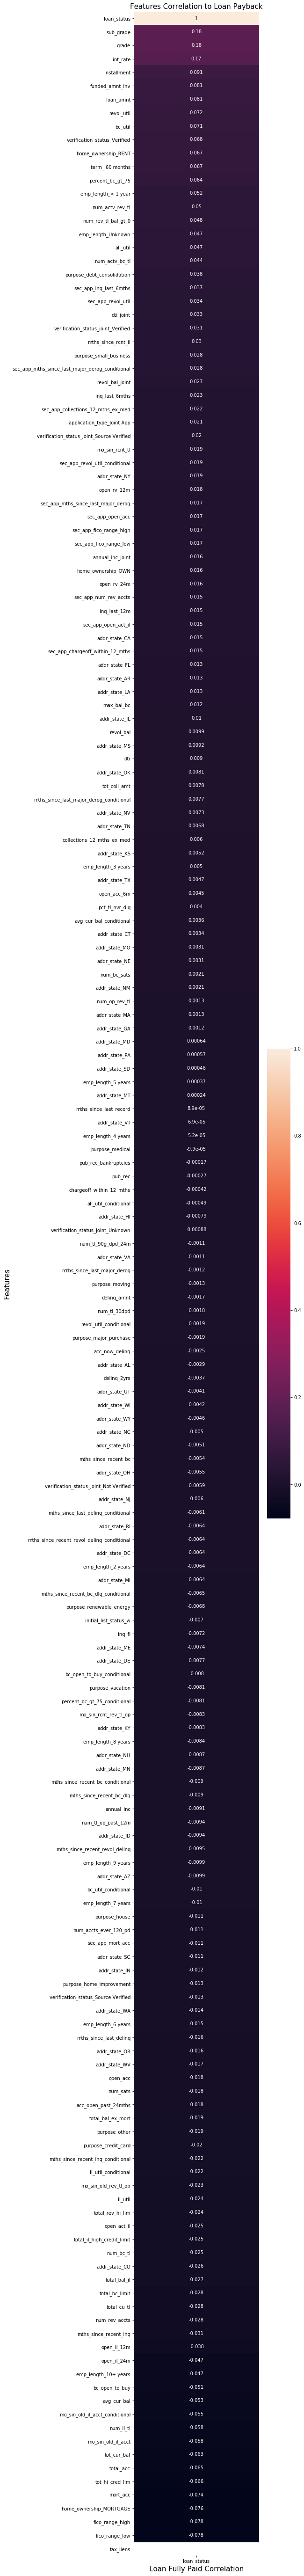

In [170]:
# Checking correlation all the features
plt.figure(figsize = (6,100))
sns.heatmap(df.corr()[['loan_status']].sort_values(by = 'loan_status', ascending = False), annot = True)
plt.title('Features Correlation to Loan Payback', fontsize = 15)
plt.xlabel('Loan Fully Paid Correlation', fontsize = 15)
plt.ylabel('Features', fontsize = 15);

## 6. Preprocessing

Number transactions before balancing X_train dataset:  (33128, 188)
Number transactions before balancing y_train dataset:  (33128,)
Number transactions before balancing X_test dataset:  (11043, 188)
Number transactions before balancing y_test dataset:  (11043,)


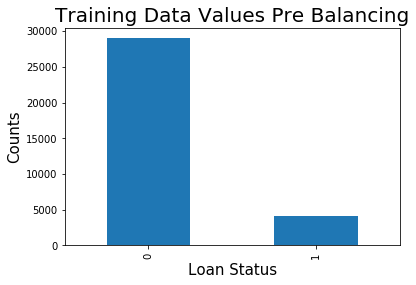

In [186]:
# create X and y
X = df.drop(columns = 'loan_status')
y = df['loan_status']

# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, stratify = y)

ss = StandardScaler()
X_train_sc = ss.fit_transform(X_train)
X_test_sc = ss.transform(X_test)

print("Number transactions before balancing X_train dataset: ", X_train.shape)
print("Number transactions before balancing y_train dataset: ", y_train.shape)
print("Number transactions before balancing X_test dataset: ", X_test.shape)
print("Number transactions before balancing y_test dataset: ", y_test.shape)

# observe that data has been balanced in training data
pd.Series(y_train).value_counts().plot.bar()
plt.title('Training Data Values Pre Balancing', size = 20)
plt.ylabel('Counts', size = 15)
plt.xlabel('Loan Status', size = 15);

Number transactions after balancing X_train dataset:  (58008, 188)
Number transactions after balancing y_train dataset:  (58008,)
Number transactions after balancing X_test dataset:  (19336, 188)
Number transactions after balancing y_test dataset:  (19336,)


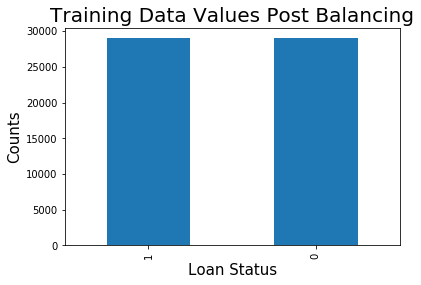

In [184]:
sm = SMOTE(random_state = 42)
X_train_new, y_train_new = sm.fit_sample(X_train_sc, y_train.ravel())
X_test_new, y_test_new = sm.fit_sample(X_test_sc, y_test.ravel())

print("Number transactions after balancing X_train dataset: ", X_train_new.shape)
print("Number transactions after balancing y_train dataset: ", y_train_new.shape)
print("Number transactions after balancing X_test dataset: ", X_test_new.shape)
print("Number transactions after balancing y_test dataset: ", y_test_new.shape)

# observe that data has been balanced in training data
pd.Series(y_train_new).value_counts().plot.bar()
plt.title('Training Data Values Post Balancing', size = 20)
plt.ylabel('Counts', size = 15)
plt.xlabel('Loan Status', size = 15);

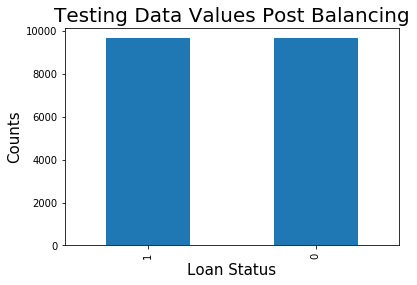

In [185]:
# observing testing data
pd.Series(y_test_new).value_counts().plot.bar()
plt.title('Testing Data Values Post Balancing', size = 20)
plt.ylabel('Counts', size = 15)
plt.xlabel('Loan Status', size = 15);

## 7. Modeling

### 7.1 Baseline Model

In [188]:
# getting percentages of each value
y_train_new.mean()

0.5

### 7.2 Logistic Regression

In [179]:
# Instantiate model
lr = LogisticRegression(random_state = 42, max_iter = 400)

# Fit model
lr.fit(X_train_new, y_train_new)

# checking accuracy scores
print(f'Logistic Regression Train Accuracy: {lr.score(X_train_new, y_train_new)}')
print(f'Logistic Regression Test Accuracy: {lr.score(X_test_new, y_test_new)}')

# predicting values for linear regression
y_hat_lr_train = lr.predict(X_train_new)
y_hat_lr_test = lr.predict(X_test_new)

# checking recall scores
lr_recall_train = recall_score(y_train_new, y_hat_lr_train)
lr_recall_test = recall_score(y_test_new, y_hat_lr_test)

print(f'Logistic Regression Train Recall: {lr_recall_train}')
print(f'Logistic Regression Test Recall: {lr_recall_test}')

Logistic Regression Train Accuracy: 0.6903185767480348
Logistic Regression Test Accuracy: 0.6741828713280926
Logistic Regression Train Recall: 0.7051785960557164
Logistic Regression Test Recall: 0.6693214729002896


### 7.3 KNeighbors Classifier

### 7.4 Random Forest Classifier

In [189]:
# Instantiate model
rf = RandomForestClassifier(random_state = 42)

# fitting model
rf.fit(X_train_new, y_train_new)

# Score model
print(f'Accuracy Score on training set: {rf.score(X_train_new, y_train_new)}')
print(f'Accuracy Score on testing set: {rf.score(X_test_new, y_test_new)}')

# predicting values for linear regression
y_hat_rf_train = rf.predict(X_train_new)
y_hat_rf_test = rf.predict(X_test_new)

# checking recall scores
rf_recall_train = recall_score(y_train_new, y_hat_rf_train)
rf_recall_test = recall_score(y_test_new, y_hat_rf_test)

print(f'Random Forest Train Recall: {rf_recall_train}')
print(f'Random Forest Test Recall: {rf_recall_test}')

Accuracy Score on training set: 1.0
Accuracy Score on testing set: 0.9159598676044683
Random Forest Train Recall: 1.0
Random Forest Test Recall: 0.8352296235002069


### 7.5 Extra Trees Classifier

In [190]:
et = ExtraTreesClassifier(random_state = 42)

# fitting model
et.fit(X_train_sc, y_train)

# Score model
print(f'Accuracy Score on training set: {et.score(X_train_new, y_train_new)}')
print(f'Accuracy Score on testing set: {et.score(X_test_new, y_test_new)}')

# predicting values for linear regression
y_hat_et_train = et.predict(X_train_new)
y_hat_et_test = et.predict(X_test_new)

# checking recall scores
et_recall_train = recall_score(y_train_new, y_hat_et_train)
et_recall_test = recall_score(y_test_new, y_hat_et_test)

print(f'Extra Trees Train Recall: {et_recall_train}')
print(f'Extra Trees Test Recall: {et_recall_test}')

Accuracy Score on training set: 0.7400703351261895
Accuracy Score on testing set: 0.5010860570955731
Extra Trees Train Recall: 0.480140670252379
Extra Trees Test Recall: 0.0022755482002482417


### 7.6 AdaBoost Classifier

In [94]:
# Instantiate model
ada = AdaBoostClassifier(random_state = 42)

# Set parameters for grid search
ada_params = {
    'n_estimators': [50,100], 
    'learning_rate': [.9, 1.]
}

# Instantiate 
ada_gs = GridSearchCV(ada, param_grid = ada_params, cv = 5)

# Fit
ada_gs.fit(X_train_sc, y_train)

# Determine best parameters
print(f'Best parameters: {ada_gs.best_params_}')
print('')

# Set best model to a new variable
ada_model = ada_gs.best_estimator_

# Score model
print(f'Score on training set: {ada_model.score(X_train_sc, y_train)}')
print(f'Score on testing set: {ada_model.score(X_test_sc, y_test)}')

# predicting values for linear regression
y_hat_ab_train = ada_gs.predict(X_train_sc)
y_hat_ab_test = ada_gs.predict(X_test_sc)

# checking recall scores
ab_recall_train = metrics.recall_score(y_train, y_hat_et_train)
ab_recall_test = metrics.recall_score(y_test, y_hat_et_test)

print(f'Extra Trees Train Recall: {ab_recall_train}')
print(f'Extra Trees Test Recall: {ab_recall_test}')

Best parameters: {'learning_rate': 0.9, 'n_estimators': 100}

Score on training set: 0.8762074378169524
Score on testing set: 0.8722267499773613
Extra Trees Train Recall: 1.0
Extra Trees Test Recall: 0.005090909090909091


### 7.7 Support Vector Machine

### 7.8 Gaussian Naive Bayes Classifier

### 7.9

## 8. Conclusions and Evaluation